In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

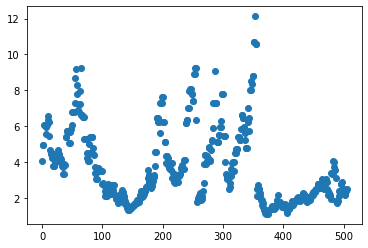

In [4]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

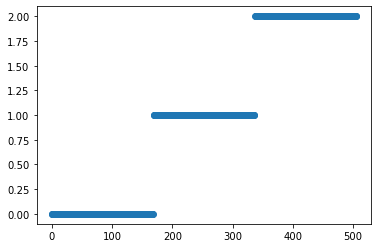

In [5]:
new_DIS, bins = pd.cut(x, bins = 3, labels = [0,1,2], retbins = True) # y değişkeninin için pd.cut fonksiyonunu kullanarak df.DIS 'ın ayrıklaştırılmış hali ile doldurun 
# NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [7]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-width")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ -0.505      168.33333333 336.66666667 505.        ]

 Ayrık değerlerin görülme sayısı
0    169
1    168
2    169
dtype: int64 


Equal-width


### Soru 

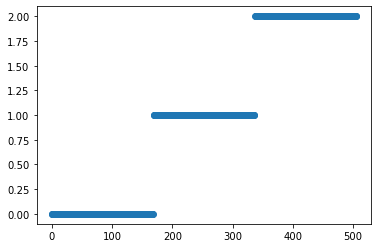

In [8]:
new_DIS, bins = pd.qcut(x, q=3, labels = [0,1,2], retbins = True)
# aynı işlemi pd.qcut kullanarak yapın
# NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [9]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-frquency")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [  0.         168.33333333 336.66666667 505.        ]

 Ayrık değerlerin görülme sayısı
0    169
1    168
2    169
dtype: int64 


Equal-frquency


# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [10]:
df_gene = df.copy()
df_gene.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
'''
- CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

'''

"\n- CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teacher ratio by town\n        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n        - LSTAT    % lower status of the population\n        - MEDV     Median value of owner-occupied homes in $1000's\n\n"

In [12]:
# seçtiğiniz iki değişkenin toplamından yeni bir değişken üretin
df_gene["ZN + INDUS"] = df_gene["ZN"] + df_gene["INDUS"]
df_gene

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ZN + INDUS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,20.31
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.07
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.07
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.18
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.93
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.93
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.93
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,11.93


In [13]:
# seçtiğiniz iki değişkenin farkından yeni bir değişken üretin
df_gene["ZN - INDUS"] = df_gene["ZN"] - df_gene["INDUS"]
df_gene

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ZN + INDUS,ZN - INDUS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,20.31,15.69
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.07,-7.07
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.07,-7.07
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.18,-2.18
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.18,-2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.93,-11.93
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.93,-11.93
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.93,-11.93
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,11.93,-11.93


In [14]:
# seçtiğiniz iki değişkenin bölümünden yeni bir değişken üretin
df_gene["ZN / INDUS"] = df_gene["ZN"] / df_gene["INDUS"]
df_gene

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ZN + INDUS,ZN - INDUS,ZN / INDUS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,20.31,15.69,7.792208
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.07,-7.07,0.000000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.07,-7.07,0.000000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.18,-2.18,0.000000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.18,-2.18,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.93,-11.93,0.000000
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.93,-11.93,0.000000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.93,-11.93,0.000000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,11.93,-11.93,0.000000


In [15]:
# seçtiğiniz iki değişkenin çarpımından yeni bir değişken üretin
df_gene["ZN * INDUS"] = df_gene["ZN"] * df_gene["INDUS"]
df_gene

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ZN + INDUS,ZN - INDUS,ZN / INDUS,ZN * INDUS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,20.31,15.69,7.792208,41.58
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.07,-7.07,0.000000,0.00
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.07,-7.07,0.000000,0.00
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.18,-2.18,0.000000,0.00
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.18,-2.18,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.93,-11.93,0.000000,0.00
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.93,-11.93,0.000000,0.00
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.93,-11.93,0.000000,0.00
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,11.93,-11.93,0.000000,0.00


sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [16]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, interaction_only=False)

In [17]:
df_pol = df.copy()

pd.DataFrame(poly.fit_transform(df_pol.drop(["PRICE"], axis = 1)))

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,3581.577,92910.3210,1165.7682,2.410203e+06,30241.39860,379.44612,6.252350e+07,7.844975e+05,9843.278760,123.505992
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,5639.752,125753.7960,2895.9176,2.804027e+06,64572.45480,1487.00488,6.252350e+07,1.439821e+06,33156.867240,763.551944
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,5639.752,124464.2572,1276.8652,2.746814e+06,28179.26722,289.08802,6.061972e+07,6.218911e+05,6379.912747,65.450827
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,6539.203,137998.1647,1028.0886,2.912204e+06,21695.96814,161.63532,6.145685e+07,4.578545e+05,3411.023868,25.412184
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,6539.203,138791.9610,1863.8477,2.945804e+06,39559.41990,531.24643,6.252350e+07,8.396328e+05,11275.492410,151.419437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,9261.000,172867.5900,4264.4700,3.226779e+06,79601.40930,1963.68690,6.023168e+07,1.485855e+06,36654.553711,904.231063
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,9261.000,175032.9000,4004.2800,3.308122e+06,75680.89200,1731.37440,6.252350e+07,1.430369e+06,32722.976160,748.613312
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,9261.000,175032.9000,2487.2400,3.308122e+06,47008.83600,668.00160,6.252350e+07,8.884670e+05,12625.230240,179.406144
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,9261.000,173511.4500,2857.6800,3.250861e+06,53540.67600,881.79840,6.090720e+07,1.003123e+06,16521.122880,272.097792


# Normalizasyon

sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [28]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [29]:
# python kodu
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(-1,1))
norm = mms.fit_transform(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE']])
df_mms = pd.DataFrame(norm, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'])
df_mms

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-1.000000,-0.64,-0.864370,-1.0,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640,-0.155556
1,-0.999528,-1.00,-0.515396,-1.0,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060,-0.262222
2,-0.999529,-1.00,-0.515396,-1.0,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068,0.320000
3,-0.999414,-1.00,-0.873900,-1.0,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223,0.262222
4,-0.998590,-1.00,-0.873900,-1.0,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325,0.386667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.998734,-1.00,-0.159091,-1.0,-0.226337,0.161908,0.363543,-0.754658,-1.000000,-0.671756,0.787234,0.975238,-0.561810,-0.226667
502,-0.999124,-1.00,-0.159091,-1.0,-0.226337,-0.019352,0.520082,-0.789413,-1.000000,-0.671756,0.787234,1.000000,-0.594371,-0.306667
503,-0.998776,-1.00,-0.159091,-1.0,-0.226337,0.308680,0.814624,-0.811238,-1.000000,-0.671756,0.787234,1.000000,-0.784216,-0.160000
504,-0.997679,-1.00,-0.159091,-1.0,-0.226337,0.238935,0.779609,-0.770972,-1.000000,-0.671756,0.787234,0.982601,-0.737859,-0.244444


sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [33]:
# python kodu
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
norm1 = std.fit_transform(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE']])
df_std = pd.DataFrame(norm1, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'])
df_std

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [35]:
# python kodu
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
norm2 = rbs.fit_transform(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE']])
df_rbs = pd.DataFrame(norm2, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'])
df_rbs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,1.880878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916,0.150470
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886,-0.075235
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714,0.338558
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756,0.100313


# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


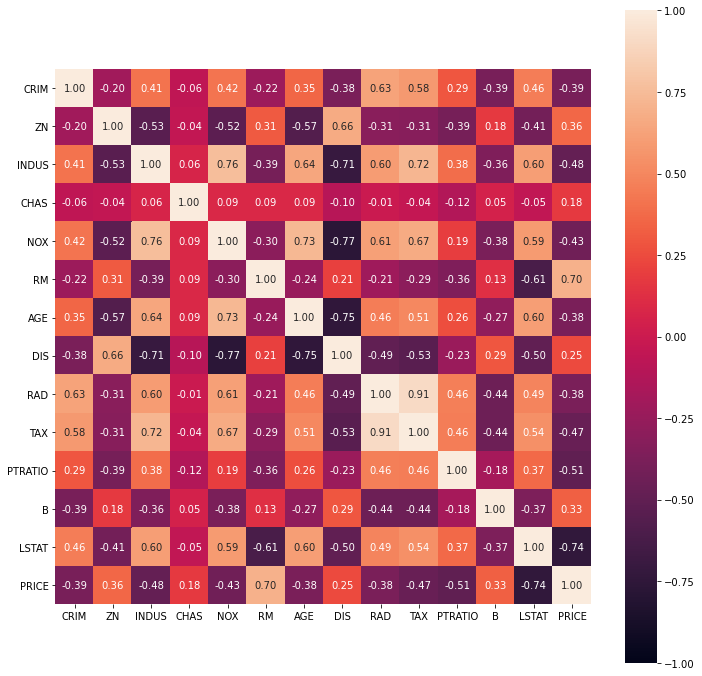

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

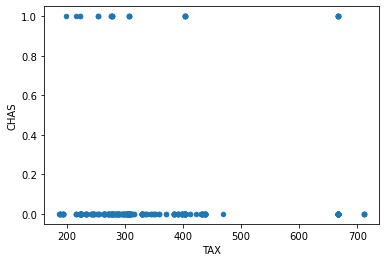

In [22]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

In [23]:
# python kodu buraya

print("Yorumunuzu bu print içine yazabilirsiniz")

Yorumunuzu bu print içine yazabilirsiniz


Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

In [24]:
# python kodu buraya

print("Yorumunuzu bu print içine yazabilirsiniz")

Yorumunuzu bu print içine yazabilirsiniz


Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

In [25]:
# python kodu buraya

print("Yorumunuzu bu print içine yazabilirsiniz")

Yorumunuzu bu print içine yazabilirsiniz


### Soru

<b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

In [26]:
# Heatmap için python kodunu bu hücreye yazın

# Bilgi: Kovaryans değerinden anlam çıkartmak korelasyona göre daha zor çıkan grafikten bunu farkedebilirsiniz.

<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

In [27]:
# Heatmap için python kodunu bu hücreye yazın

# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? :)